# Step 1: Installation and Setup

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.13.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from kaggle to google colab

In [4]:
# install kaggle API
! pip install kaggle

In [5]:
import os
import json

# Load the Kaggle API key from a JSON file
with open("kaggle (1).json", "r") as file:
    kaggle_info = json.load(file)

# Set Kaggle username and key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_info["username"]
os.environ['KAGGLE_KEY'] = kaggle_info["key"]

In [6]:
# list of datasets
! kaggle datasets list

ref                                                                title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                            Most Streamed Spotify Songs 2023                 47KB  2023-08-26 11:04:57          24815        759  1.0              
aemyjutt/laptop-price-analysis                                     Laptop_Price_Analysis                            21KB  2023-10-02 07:46:46            795         24  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset                 Customer Shopping Trends Dataset                146KB  2023-10-05 06:45:37           1440         42  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023        

In [7]:
# import the dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
# unzipping dataset
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [9]:
dataset_1  = pd.read_csv('creditcard.csv')

In [10]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3: Data Preprocessing

In [11]:
dataset_1.shape

(284807, 31)

In [12]:
# checking the null values
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
# observations in each class
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
# balance the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [16]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [17]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [18]:
non_fraud_t.shape

(492, 31)

In [19]:
# merge dataset
dataset = fraud.append(non_fraud_t, ignore_index=True)

/var/folders/1p/lzvh8nn53hd76nt7l85mqcqh0000gn/T/ipykernel_84311/3921213925.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = fraud.append(non_fraud_t, ignore_index=True)


In [20]:
print(dataset)

         Time        V1        V2        V3        V4        V5        V6  \
0       406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...       ...       ...       ...       ...       ...       ...   
979   48973.0 -0.231941  0.050599  1.398802 -0.893910 -0.442613  0.269010   
980  153705.0 -0.459015 -0.207853  2.189452 -2.001899 -0.922265  0.218596   
981   75469.0 -0.384460  0.613443  1.438978  0.520308  0.655791 -0.443711   
982  135271.0 -0.099092  0.888361 -1.171567 -0.713187  1.955588 -1.387362   
983  162748.0  1.971860  0.025494 -1.588571  0.660162 -0.180167 -1.706831   

           V7        V8        V9  ...       V21       V22       V23  \
0  

In [21]:
# observations in each class
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [22]:
# matrix of features
x = dataset.drop(labels=['Class'], axis=1)

In [23]:
# dependent variable
y = dataset['Class']

In [24]:
x.shape, y.shape

((984, 30), (984,))

In [25]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [27]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
x_train

array([[-0.36063515,  0.08884457, -0.31757233, ..., -0.50087659,
        -0.02434921, -0.012856  ],
       [-0.81833558,  0.52407192, -0.0916109 , ...,  0.45835785,
         0.51600799, -0.38571412],
       [-0.8553742 ,  0.20554492,  0.10031043, ...,  0.30140693,
         0.39401559, -0.38486712],
       ...,
       [-1.2191001 , -0.29923435, -3.16317387, ..., -0.54922842,
         0.885317  ,  9.36361702],
       [ 0.6388229 , -0.47238364,  0.06382132, ..., -0.40637884,
        -0.45075566, -0.07080518],
       [-0.94302251,  0.36168882, -0.20729097, ..., -0.1238332 ,
         0.23294562, -0.34294043]])

In [29]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [30]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [31]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [32]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Step 4: Building the model

In [33]:
# defining an object
model = tf.keras.models.Sequential()

In [34]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape = (30, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [35]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [36]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [37]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [38]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 30, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 15, 64)            2

In [40]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [41]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Training the model

In [42]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25


25/25 [==============================] - 1s 9ms/step - loss: 0.9126 - accuracy: 0.6023 - val_loss: 0.6530 - val_accuracy: 0.7360
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.7332 - val_loss: 0.6293 - val_accuracy: 0.8274
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.8132 - val_loss: 0.6026 - val_accuracy: 0.8579
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4917 - accuracy: 0.7992 - val_loss: 0.5662 - val_accuracy: 0.8832
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8361 - val_loss: 0.5235 - val_accuracy: 0.9137
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.3618 - accuracy: 0.8679 - val_loss: 0.4807 - val_accuracy: 0.9340
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.3727 - accuracy: 0.8691 - val_loss: 0.4407 - val_accuracy: 0.9340
Epoch 8/25
25/25 [=============

In [43]:
# Model prediction
y_pred_probs = model.predict(x_test)  # Get predicted probabilities for the positive class

# Convert predicted probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype("int32")

7/7 [==============================] - 0s 1ms/step


In [44]:
print(y_pred[12]), print(y_test[12])

[1]
1


(None, None)

In [45]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[104   2]
 [  8  83]]


In [46]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.949238578680203


# Step 6: Learning Curve

In [47]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

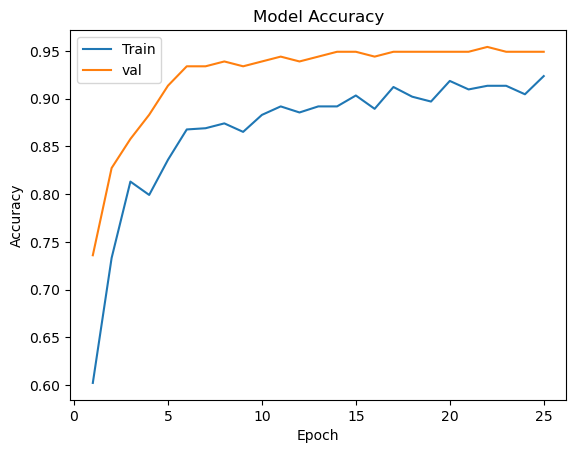

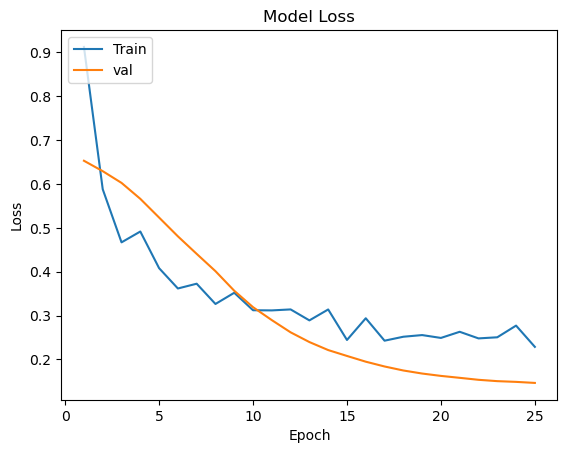

In [48]:
learning_curve(history, 25)